In [17]:
### DNA/DNA 4-way branch migration with no bulge (22nt branch migration domain) with blockers ###

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import pandas as pd

import scipy.optimize as opt
import scipy.integrate as scint
from pylab import *

import jax
import jax.numpy as jnp
from jax.experimental.ode import odeint as jodeint
from jax.config import config
config.update('jax_enable_x64', True)

In [18]:
#define function to standardise plots
def annotate_ax(ax,title):
    ax.set_ylabel('Concentration (nM)', fontname = 'Arial', fontsize = 16)
    ax.set_xlabel('Time (s)', fontname = 'Arial', fontsize = 16)
    ax.set_title(title)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [19]:
#import the no bulge with blockers data (replicate = 1)
labels = ['Time'] + ['20', '50', '100', '200', '500', '1000']
No_b_block1 = pd.read_csv(('../Data/No bulge (22) blocker 1.csv'), header = None)
No_b_block1= No_b_block1.T[1:].astype(float)
No_b_block1.columns = labels

#introduce an initial row for time 0
Init_row = pd.DataFrame({'Time': 0.,'20' :0., '50' : 0., '100': 0., '200': 0., '500' : 0., '1000' : 0.}, index = [0])

No_b_block1 = pd.concat([Init_row, No_b_block1], ignore_index = True)

No_b_block1 = pd.melt(No_b_block1,
        id_vars=['Time'],
        var_name='Conc', value_vars=['20', '50', '100', '200', '500', '1000'],
        value_name='Fluorescence'
    ).astype(float)
print(No_b_block1)

        Time    Conc  Fluorescence
0       0.00    20.0      0.000000
1       3.50    20.0      0.000000
2       4.07    20.0     -0.003773
3       4.64    20.0     -0.008174
4       5.21    20.0      0.005659
...      ...     ...           ...
5965  567.23  1000.0      4.961016
5966  567.80  1000.0      5.046529
5967  568.37  1000.0      5.040556
5968  568.94  1000.0      4.915116
5969  569.51  1000.0      4.969190

[5970 rows x 3 columns]


In [20]:
#import the no bulge with blockers data (replicate = 2)
labels = ['Time'] + ['20', '50', '100', '200', '500', '1000']
No_b_block2 = pd.read_csv(('../Data/No bulge (22) blocker 2.csv'), header = None)
No_b_block2= No_b_block2.T[1:].astype(float)
No_b_block2.columns = labels

#introduce an initial row for time 0
Init_row = pd.DataFrame({'Time': 0.,'20' :0., '50' : 0., '100': 0., '200': 0., '500' : 0., '1000' : 0.}, index = [0])

No_b_block2 = pd.concat([Init_row, No_b_block2], ignore_index = True)

No_b_block2 = pd.melt(No_b_block2,
        id_vars=['Time'],
        var_name='Conc', value_vars=['20', '50', '100', '200', '500', '1000'],
        value_name='Fluorescence'
    ).astype(float)
print(No_b_block2)

        Time    Conc  Fluorescence
0       0.00    20.0      0.000000
1       3.50    20.0      0.000000
2       4.07    20.0     -0.031721
3       4.64    20.0     -0.017357
4       5.21    20.0     -0.043392
...      ...     ...           ...
5965  567.23  1000.0      4.806679
5966  567.80  1000.0      4.830321
5967  568.37  1000.0      4.841992
5968  568.94  1000.0      4.844087
5969  569.51  1000.0      4.784534

[5970 rows x 3 columns]


In [21]:
#import the no bulge with blockers data (replicate = 3)
labels = ['Time'] + ['20', '50', '100', '200', '500', '1000']
No_b_block3 = pd.read_csv(('../Data/No bulge (22) blocker 3.csv'), header = None)
No_b_block3= No_b_block3.T[1:].astype(float)
No_b_block3.columns = labels

#introduce an initial row for time 0
Init_row = pd.DataFrame({'Time': 0.,'20' :0., '50' : 0., '100': 0., '200': 0., '500' : 0., '1000' : 0.}, index = [0])

No_b_block3 = pd.concat([Init_row, No_b_block3], ignore_index = True)

No_b_block3 = pd.melt(No_b_block3,
        id_vars=['Time'],
        var_name='Conc', value_vars=['20', '50', '100', '200', '500', '1000'],
        value_name='Fluorescence'
    ).astype(float)
print(No_b_block3)

        Time    Conc  Fluorescence
0       0.00    20.0      0.000000
1       3.50    20.0      0.000000
2       4.07    20.0     -0.005134
3       4.64    20.0      0.008759
4       5.21    20.0     -0.028390
...      ...     ...           ...
5965  567.23  1000.0      4.940803
5966  567.80  1000.0      4.968892
5967  568.37  1000.0      4.977952
5968  568.94  1000.0      4.897010
5969  569.51  1000.0      5.000000

[5970 rows x 3 columns]


In [22]:
#combine replicate 1, replicate 2 and replicate 3 data 
No_b_block = pd.concat([
    No_b_block1.assign(Replicate=1),
    No_b_block2.assign(Replicate=2), 
    No_b_block3.assign(Replicate=3)
]).reset_index(drop=True)

In [23]:
#plot all of the curves for the no bulge (22nt branch migration domain) with blockers data
colors = sns.cubehelix_palette(n_colors = 7, start = 0, rot=0.5)[:-1]

sns.lineplot(data = No_b_block, x='Time', y='Fluorescence',units='Replicate',hue='Conc', estimator=None, palette=colors)

ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()

labels = ['20nM', '50nM', '100nM', '200nM', '500nM', '1000nM']
handles = [handles[0], handles[1], handles[2], handles[3], handles[4], handles[5]]
ax.legend(handles,labels,title="Input (nM)", loc='lower right')

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '12')

annotate_ax(plt.gca(),'')

In [24]:
#define functions for fitting ODE model to experimental data and estimating rate constants
def TMSD_rhs(concs, t, k_on, k_off, k_bm):
    '''Right-hand side of the ODE system
    Accepts concentration of reactants at a given time t and returns the derivative of those concentrations.
    
    Parameters
    ----------
    concs : float
        (nM) concentration of reactants and products at time t
    t : array
        (s) time over which the experiment was performed
    k_on : float
        (M-1.s-1) toehold binding rate constant 
    k_off : float
        (s-1) toehold unbinding rate constant 
    k_bm : float 
        (s-1) branch migration domain rate constant
    
    Returns
    ----------
    array
        (nM) derivatives for all of the reactants and products in the reaction
        
    '''
    Input, Probe, t_only, F, Q = concs
    
    #define the system of ODEs
    dInput_dt = k_off*t_only-k_on*Input*Probe
    dProbe_dt = dInput_dt

    dtonly_dt = k_on*Input*Probe - k_off*t_only - k_bm*t_only 
    
    dF_dt = k_bm*t_only
    dQ_dt = dF_dt

    return jnp.array([dInput_dt, dProbe_dt, dtonly_dt, dF_dt, dQ_dt])

def solve_TMSD(t, params):
    '''Solve the ODE system using JAX
    
    Parameters
    ----------
    t : array
        (s) time over which the experiment was performed
    params : array_like
        List of `Input_init`, `Probe_init`, `k_on`, `k_off`, `k_bm`. Initial concentrations
        should be specified in nM and rate constants as log10 of their M-1.s-1 or s-1 values (e.g., `k_on`= 6.64)
    
    Returns
    ---------- 
    array
        (nM) Fluorescent intensity over time `t`
    '''

    Input_init, Probe_init, k_on, k_off, k_bm = params
    t_only_init = 0.
    F_init = 0. 
    Q_init = 0.
    
    concs_i = jnp.array([Input_init, Probe_init, t_only_init, F_init, Q_init])

    sol = jodeint(TMSD_rhs,concs_i,t, 10**(k_on-9), 10**(k_off), 10**(k_bm))

    return sol[:,-1]

@jax.jit
def vsolve_TMSD(t, Input_inits, Probe_init, k_on, k_off, k_bm):
    '''Solves the ODE system across all input concentrations
    
    Parameters
    ----------
    t : array
        (s) time over which the experiment was performed
    Input_inits : array
        (nM) Initial concentrations of the Input complex
    Probe_init : 1d array 
        (nM) Initial concentration of the Probe complex 
    k_on : float
        (M-1.s-1) toehold binding rate constant 
    k_off : float
        (s-1) toehold unbinding rate constant 
    k_bm : float 
        (s-1) branch migration rate constant
        
    Returns
    ---------- 
    array
        (nM) integral of ODE system across all initial Input concentration
    '''
    params = [Probe_init, k_on, k_off, k_bm]
    return jax.vmap(lambda Input_init_i: solve_TMSD(t, [Input_init_i, *params]))(Input_inits)


def fit_TMSD_global(t, data, Input_inits, Probe_init, k_on): 
    """Fits a global krep to n curves with m readings
    
    
    Parameters
    ----------
    t: 1d array of length m
    
    data: 2d array of size mxn
    
    Input_inits: 1d array of length n
    
    Probe_init: 1d array of length 1
    
    k_on: 1d array of length 1
    """
    n,m = data.shape

    def _solve_TMSD_global(t, k_off, k_bm):
        # generate nxm array of solutions at given parameter values        
        sol_array = vsolve_TMSD(jnp.array(t), jnp.array(Input_inits), Probe_init[0], k_on[0], k_off, k_bm)
        return sol_array.reshape(1,n*m).flatten()

    data_flat = jnp.array(data.reshape(1,n*m)).flatten()
    
    def RMSE(data, pred):
        return np.sqrt(np.mean(np.square(data-pred)))
    
    popt, pcov = opt.curve_fit(_solve_TMSD_global, t, data_flat,
                               p0=[1., 1.],
                               bounds=([-10, -10],[10, 10]))

    return popt, pcov

In [25]:
def unpack_values(series): return np.array([np.array(rxn) for rxn in series.values])
def collapse(df): return df.groupby(['Conc', 'Replicate']).agg(list)

grouped_data = collapse(No_b_block).reset_index().sort_values("Conc").reset_index(drop=True)

# Gather the reaction fluorescence and time data in rectangular arrays of shape nxm
fluor = unpack_values(grouped_data.Fluorescence)
time = unpack_values(grouped_data.Time)
conc = grouped_data.Conc.values

In [26]:
Probe_init = jnp.atleast_1d(5.)
k_on = jnp.atleast_1d(7.)

def fit_TMSD_global_pd(t, F, Input_i): 
    '''Wraps `fit_TMSD_global` to be more compatible with pandas'''
    popt, pcov = fit_TMSD_global(t,F,Input_i, Probe_init, k_on)
    errs = np.sqrt(np.diag(pcov))
    return [out for outs in zip(popt,errs) for out in outs]

In [27]:
fit_params_global = fit_TMSD_global_pd(time[0,:],fluor,conc)

In [28]:
popt, pcov = fit_TMSD_global(time[0,:], fluor,conc, Probe_init, k_on)

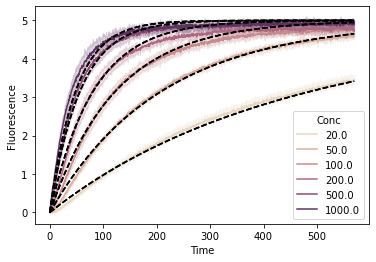

In [29]:
label = ['20nM', '50nM', '100nM', '200nM', '500nM', '1000nM']

#Plot the global fits to the experimental data
sns.lineplot(data=No_b_block, x='Time', y='Fluorescence', hue='Conc', palette=colors)
TMSD_sol = vsolve_TMSD(time[0,:], conc, Probe_init[0], k_on[0], *popt).T
plot(time.T, TMSD_sol,'--', c = 'black', label = label)

In [30]:
def jackknife(fluor, conc):
    """
    Given data points 'data', return a list of arrays where each array is a set of 
    jackknife indexes. For a given set of data, the jackknife sample J[i] is 
    defined as the data set with the ith data point deleted.
    """
    base = np.arange(0,len(fluor)) #gives the number of rows in the dataset
    p_jack_koff = []
    p_jack_kbm = []
    for i in base: 
        jack_fluor = np.delete(fluor, i, 0)
        jack_conc = np.delete(conc, i, 0)
        p_jack_ind = np.array(fit_TMSD_global_pd(time[0,:], jack_fluor, jack_conc))
        p_jack_koff = np.append(p_jack_koff, p_jack_ind[0])
        p_jack_kbm = np.append(p_jack_kbm, p_jack_ind[2])
    return p_jack_koff, p_jack_kbm

p_jack_koff, p_jack_kbm = jackknife(fluor, conc) 

In [31]:
###calculate the mean of koff
mean_koff = np.mean(p_jack_koff)
jack_est_koff = len(conc)*fit_params_global[0] - (len(conc)-1)*mean_koff

###calculate the standard error on the mean of koff
var_koff = np.var(p_jack_koff)*len(conc)
err_koff = np.sqrt(((len(conc)-1)/len(conc))*(var_koff))

###calculate the mean of kbm
mean_kbm = np.mean(p_jack_kbm)
jack_est_kbm = len(conc)*fit_params_global[2] - (len(conc)-1)*mean_kbm

###calculate the standard error on the mean of kbm
var_kbm = np.var(p_jack_kbm)*len(conc)
err_kbm = np.sqrt(((len(conc)-1)/len(conc))*(var_kbm))


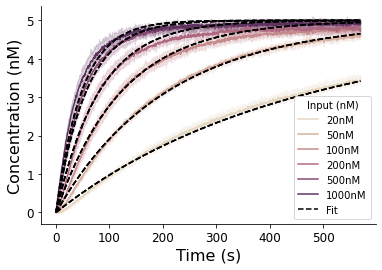

In [32]:
#plot the global fits associated with the jackknife estimates

sns.lineplot(data=No_b_block, x='Time', y='Fluorescence', hue='Conc', palette=colors)
TMSD_sol = vsolve_TMSD(time[0,:], conc, Probe_init[0], k_on[0], jack_est_koff ,jack_est_kbm).T
plot(time.T, TMSD_sol,'--', c = 'black', label = labels)

ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()

labels = ['20nM', '50nM', '100nM', '200nM', '500nM', '1000nM', 'Fit']
handles = [handles[0], handles[1], handles[2], handles[3], handles[4], handles[5], handles[6]]
ax.legend(handles,labels,title="Input (nM)", loc='lower right')

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '12')

annotate_ax(plt.gca(),'')
plt.savefig('Nobulge22.svg', format='svg')